<a href="https://colab.research.google.com/github/dajuctech/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse parameters that affect accuracy

# Iris Learning Rate Exercise
Exercise to adjust the learning rate of the optimiser



Load the libraries and prepare the data

In [3]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# 2. split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
Y_train_cat = utils.to_categorical(Y_train)
Y_test_cat = utils.to_categorical(Y_test)


the code loads the Iris dataset, prepares it for machine learning, and then splits it into training and testing sets.

Here's a breakdown:

Libraries and their purposes:

* pandas (pd): Used for data manipulation and analysis, primarily through DataFrames.
* IPython.display: Provides tools for displaying rich content in Jupyter notebooks.
* sklearn.datasets: Contains various datasets, including the Iris dataset used here.
* sklearn.preprocessing: Offers tools for data preprocessing, such as normalization.
* sklearn.model_selection: Provides functions for splitting data into training and testing sets.
* keras: A high-level deep learning library used for building and training neural networks.
* matplotlib.pyplot (plt): Used for creating visualizations, such as plots.

Step-by-step explanation:

* Import necessary libraries: The code starts by importing the required libraries.
* Load the Iris dataset: load_iris() loads the Iris dataset, which contains information about different iris flower species.
* Create a DataFrame: pd.DataFrame() converts the dataset into a pandas DataFrame for easier manipulation.
* Normalize the data: normalize() scales the data to a common range, which can improve model performance.
* Split data into training and testing sets: train_test_split() divides the data into two sets: one for training the model and another for evaluating its performance.
* One-hot encode the target variable: utils.to_categorical() converts the target variable (iris species) into a format suitable for multi-class classification using neural networks.

Why these steps are taken:

* Data Loading and Preprocessing: To prepare the data for machine learning, it needs to be loaded, cleaned, and formatted appropriately.
* Data Splitting: Splitting the data into training and testing sets helps ensure that the model can generalize well to unseen data.
* One-Hot Encoding: This is necessary for training a neural network for multi-class classification, where the target variable has more than two possible values.

Create, compile, fit the model and plot the accuracy and loss


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3899 - loss: 1.1093 - val_accuracy: 0.2368 - val_loss: 1.1194
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3765 - loss: 1.0915 - val_accuracy: 0.2368 - val_loss: 1.1055
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3590 - loss: 1.0807 - val_accuracy: 0.2368 - val_loss: 1.0919
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3739 - loss: 1.0653 - val_accuracy: 0.2368 - val_loss: 1.0799
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3628 - loss: 1.0528 - val_accuracy: 0.2368 - val_loss: 1.0668
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4223 - loss: 1.0304 - val_accuracy: 0.4211 - val_loss: 1.0562
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6367 - loss: 1.0163 - val_accuracy: 0.5263 - val_loss: 1.0438
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6613 - loss: 1.0200 - val_accuracy: 0.5789 - 

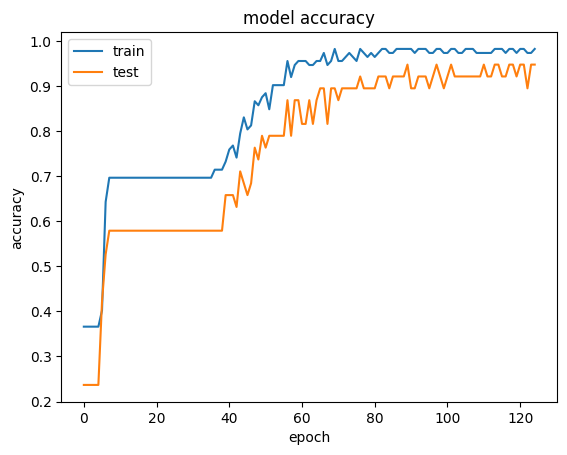

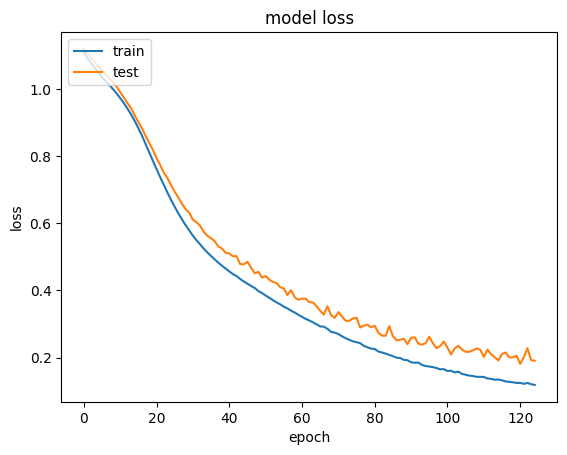

In [4]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The code builds, trains, and evaluates a neural network model for classifying Iris flowers into three species.

Interpretation:

* Model Structure: The model has three layers: two hidden layers with 10 units each (using the 'relu' activation function), and an output layer with 3 units (using the 'softmax' activation function for multi-class classification).

* Training Process: The model is trained using the 'adam' optimizer and 'categorical_crossentropy' loss function. It's trained for 125 epochs (iterations over the entire training data) with a batch size of 10.

* Accuracy: The accuracy plot shows how the model's accuracy improves over time during training (both on the training data and the validation/test data). Ideally, both lines should increase and converge, indicating the model is learning effectively and generalizing well.

* Loss: The loss plot shows how the model's error decreases over time during training. A lower loss generally means a better-performing model. Similar to accuracy, both lines should decrease and converge for optimal performance.

* In simple terms: The code creates a model to predict the type of Iris flower. It trains the model on a portion of the data and tests it on the remaining data. The plots show how well the model is learning and how confident it is in its predictions. Ideally, you want high accuracy and low loss, indicating a well-performing and reliable model.

* Important Note: Without seeing the actual plots, it's difficult to provide a specific assessment of the model's performance. However, this interpretation provides a general understanding of what the code is doing and how to evaluate the outcome.

## Adjust the learning rate of the optimiser
Instead of specifying the optimiser as a string, you can specify the optimiser as an object.  Specifying the optimiser as a string means that it uses it's default parameters.  By specifying it as an object, you have more flexibility and can change it's parameters.  Implement the optimiser as an object so you can change the learning rate (hint: see [keras optimisers](https://keras.io/api/optimizers)).  As we are using Keras from within tensorflow, you will also need to import tensorflow and reference keras from that.  Then you will be able to access the `optimizers` module as in the Keras documentation.



```
import tensorflow as tf
tf.keras.optimizers...
```



In [8]:
!pip install tensorflow
import tensorflow as tf

In [10]:
# Create an optimizer object and set the learning rate:
opt = tf.keras.optimizers.Adam(learning_rate=0.01) # Example learning rate of 0.01

In [11]:
#Use the optimizer object in model.compile:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Set the learning rate to the following values.  You will need to re-create, re-compile and re-fit the model and re-plot the accuracy and loss to try out each learning rate.


*   0.0001
*   0.001
*   0.01
*   1




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4023 - loss: 1.0820 - val_accuracy: 0.2368 - val_loss: 1.1582
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3978 - loss: 1.0822 - val_accuracy: 0.2368 - val_loss: 1.1481
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4210 - loss: 1.0785 - val_accuracy: 0.2368 - val_loss: 1.1435
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3313 - loss: 1.0887 - val_accuracy: 0.2368 - val_loss: 1.1366
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4043 - loss: 1.0814 - val_accuracy: 0.2368 - val_loss: 1.1318
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3124 - loss: 1.1001 - val_accuracy: 0.2368 - val_loss: 1.1185
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4066 - loss: 1.0459 - val_accuracy: 0.2368 - val_loss: 1.1017
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3326 - loss: 1.0719 - val_accuracy: 0.2368 - 

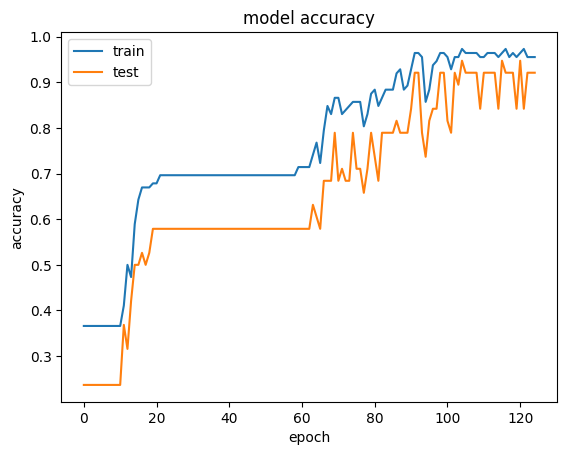

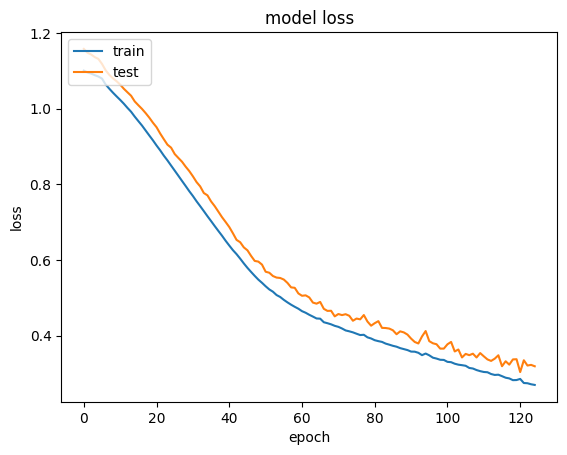

In [14]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2748 - loss: 1.1636 - val_accuracy: 0.3421 - val_loss: 1.1158
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3654 - loss: 1.1026 - val_accuracy: 0.3421 - val_loss: 1.1135
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3493 - loss: 1.1104 - val_accuracy: 0.3421 - val_loss: 1.1113
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3680 - loss: 1.0984 - val_accuracy: 0.3421 - val_loss: 1.1093
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3255 - loss: 1.1202 - val_accuracy: 0.3421 - val_loss: 1.1072
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3256 - loss: 1.1184 - val_accuracy: 0.3421 - val_loss: 1.1053
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3594 - loss: 1.0964 - val_accuracy: 0.3421 - val_loss: 1.1036
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3464 - loss: 1.1027 - val_accuracy: 0.3421 - 

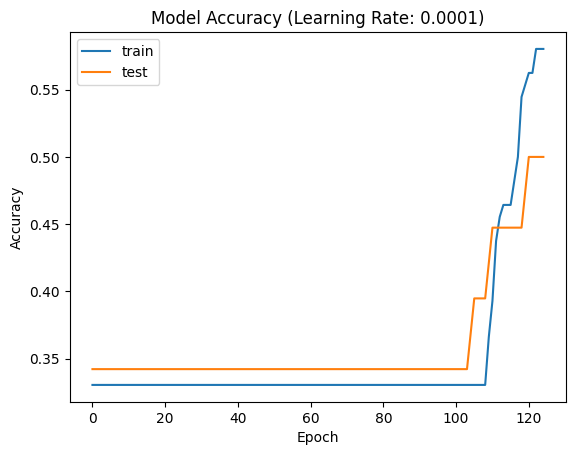

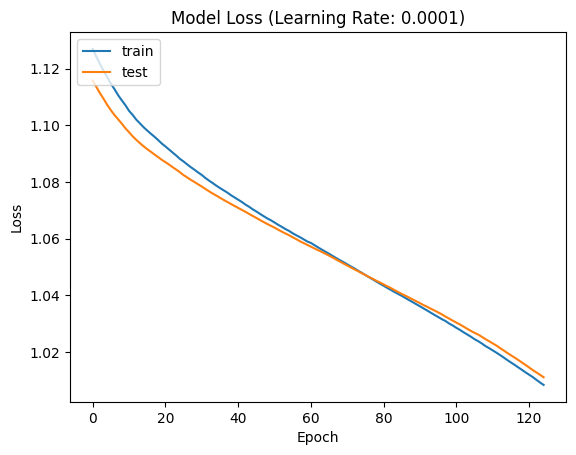

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3367 - loss: 1.1019 - val_accuracy: 0.3421 - val_loss: 1.0968
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3119 - loss: 1.0957 - val_accuracy: 0.3421 - val_loss: 1.0899
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3150 - loss: 1.0897 - val_accuracy: 0.3421 - val_loss: 1.0857
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3336 - loss: 1.0816 - val_accuracy: 0.3421 - val_loss: 1.0818
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3567 - loss: 1.0768 - val_accuracy: 0.3421 - val_loss: 1.0773
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3692 - loss: 1.0715 - val_accuracy: 0.3947 - val_loss: 1.0739
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5046 - loss: 1.0671 - val_accuracy: 0.5526 - val_loss: 1.0700
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6755 - loss: 1.0712 - val_accuracy: 0.5789 -

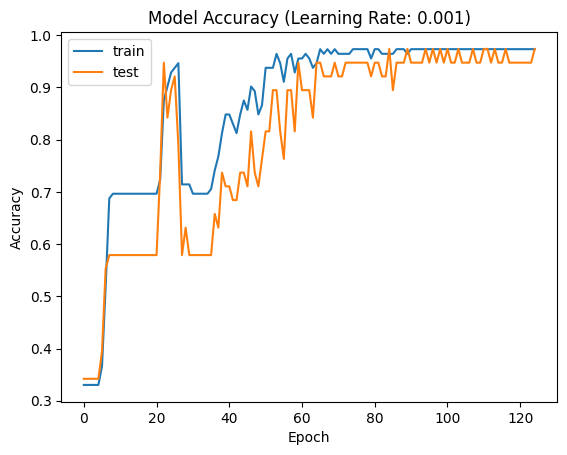

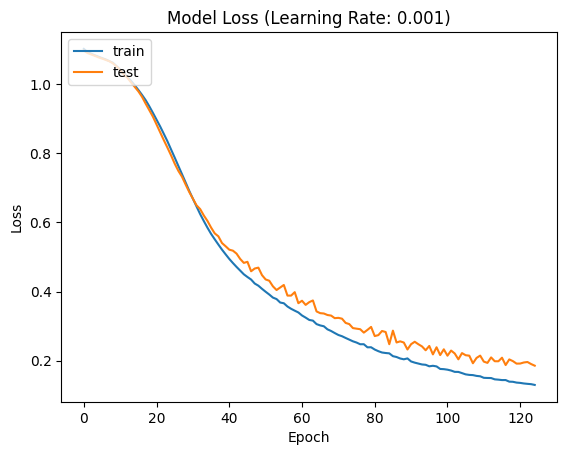

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3041 - loss: 1.1131 - val_accuracy: 0.5789 - val_loss: 1.0930
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4331 - loss: 1.0784 - val_accuracy: 0.3684 - val_loss: 1.0415
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5784 - loss: 1.0125 - val_accuracy: 0.5789 - val_loss: 0.9432
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7072 - loss: 0.8819 - val_accuracy: 0.5789 - val_loss: 0.7865
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7541 - loss: 0.6536 - val_accuracy: 0.5789 - val_loss: 0.6143
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7090 - loss: 0.5127 - val_accuracy: 0.5789 - val_loss: 0.4958
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7315 - loss: 0.4484 - val_accuracy: 0.6053 - val_loss: 0.4636
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9221 - loss: 0.4009 - val_accuracy: 0.6579 - 

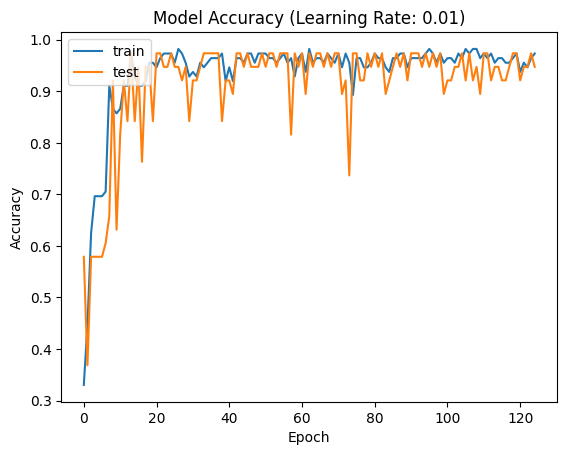

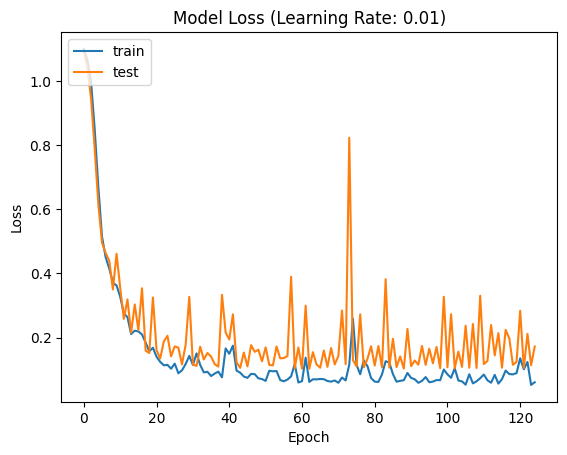

ValueError: Argument `learning_rate` should be float, or an instance of LearningRateSchedule, or a callable (that takes in the current iteration value and returns the corresponding learning rate value). Received instead: learning_rate=1

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Learning rates to try
learning_rates = [0.0001, 0.001, 0.01, 1]

for lr in learning_rates:
    # Recreate the model
    model = Sequential()
    model.add(Dense(units=10, input_dim=4, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    # Recompile the model with the current learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Re-fit the model
    history = model.fit(X_train, Y_train_cat, batch_size=10, epochs=125,
                        verbose=1, validation_data=(X_test, Y_test_cat))

    # Re-plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy (Learning Rate: {lr})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Re-plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss (Learning Rate: {lr})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Learning Rate is between 0 and 1 and if assign to 0 or 1 will result to error